# Pokemon Stats

### Author : Hafiz Fahrurrozi

This data set includes 721 Pokemon, including their PokeDex number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed. The data set can be retrieved from [here](https://www.kaggle.com/abcsds/pokemon).
<br><br>
In this notebook, we have 3 **objectives**:
 1. Show Pokemon distribution across generations.
 2. Show types of legendary Pokemon in generation 3 games.
 3. Show Pokemon with highest stats in each base stats category (HP, Attack, Defense, Sp. Atk, Sp. Def, Speed).

## Library Import and Data Cleaning
For data processing and visualization purposes, we will use numpy and pandas library. We use **import** to load both libraries and uses initial pd and np with **as**.

In [1]:
import pandas as pd, numpy as np

After loading the libraries, we use read_csv() to load data from Pokemon.csv to a dataframe df and display the dataframe to ensure the data loaded successfully.

In [2]:
df = pd.read_csv('Pokemon.csv') #read file Pokemon.csv
display(df)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


Next we run info() to see the columns, non-null count, and data types of the dataframe. If there are any missing value, the non-null count won't be equal to the index.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In Type 2, there are **414** non-null object, which means we need to fill the null (NaN) data.<br>
Next we use describe() to show statistical data for numerical data inside the dataframe.

In [4]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


Next, we replace the null (NaN) in Type 2 with 'None' using fillna() and checks if there are any null data left in the dataframe with isnull() and any().

In [5]:
df['Type 2'].fillna('None', inplace=True)
df.isnull().values.any()

False

No null data, now we can work with the dataframe.

## 1. Pokemon Distribution in All Generations
First, we want to know how much pokemon there are in each generations.<br>
To do this, we need to know how many generation there are in the data. We will also drop the base stats columns to simplify our dataframe.<br>
We define new dataframe sPoke for this section. It contains columns: Name, Type 1, Type 2, Generation, and Legendary from dataframe df. Then we check the new dataframe using display().

In [6]:
sPoke = df[['Name','Type 1','Type 2','Generation','Legendary']]
display(sPoke)

,Name,Type 1,Type 2,Generation,Legendary
0,Bulbasaur,Grass,Poison,1,False
1,Ivysaur,Grass,Poison,1,False
2,Venusaur,Grass,Poison,1,False
3,VenusaurMega Venusaur,Grass,Poison,1,False
4,Charmander,Fire,None,1,False
...,...,...,...,...,...
795,Diancie,Rock,Fairy,6,True
796,DiancieMega Diancie,Rock,Fairy,6,True
797,HoopaHoopa Confined,Psychic,Ghost,6,True
798,HoopaHoopa Unbound,Psychic,Dark,6,True


Next, we will see how many generations of pokemon there are in the dataframe using unique().

In [7]:
sPoke.Generation.unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

Next, we will show the distribution of Pokemon types in each generation. We use pivot_table() to group the data and count the number of Pokemon with combination of Type 1 and Type 2. Margins option is enabled to display the sum of data in rows and columns. Pivot table referenced from [here](https://stackoverflow.com/a/63288494), [here](https://stackoverflow.com/questions/49680648/row-sum-on-a-pandas-pivot-table) and [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html)
<br><br>
We will use transpose() to make the table wide, so you don't have to scroll down so many times. In exchange, now you can scroll sideways because we also set max columns of pandas to 200 with set_option() to display our horizontal longcat (all columns). (^・ω・^  )~

In [8]:
pd.set_option('display.max_columns', 200) #longcat here (^・ω・^ )
dis = pd.pivot_table(sPoke, values='Name', index=['Type 1', 'Type 2'], columns=['Generation'], aggfunc='count', fill_value=0, margins=True)
dis.transpose()

Type 1          Bug                                                           \
Type 2     Electric Fighting Fire Flying Ghost Grass Ground None Poison Rock   
Generation                                                                     
1                 0        0    0      3     0     2      0    3      6    0   
2                 0        2    0      3     0     0      0    1      2    1   
3                 0        0    0      3     1     0      1    5      1    0   
4                 0        0    0      4     0     1      1    3      0    0   
5                 2        0    2      0     0     3      0    3      3    2   
6                 0        0    0      1     0     0      0    2      0    0   
All               2        2    2     14     1     6      2   17     12    3   

Type 1                   Dark                                              \
Type 2     Steel Water Dragon Fighting Fire Flying Ghost Ice None Psychic   
Generation                                                                  
1              0     0      0        0    0      0     0   0    0       0   
2              3     0      0        0    3      1     0   1    1       0   
3              0     1      0        0    0      0     2   0    4       0   
4              1     0      0        0    0      1     0   1    1       0   
5              3     0      3        2    0      2     0   0    4       0   
6              0     0      0        0    0      1     0   0    0       2   
All            7     1      3        2    3      5     2   2   10       2   

Type 1             Dragon                                           Electric  \
Type 2     Steel Electric Fairy Fire Flying Ground Ice None Psychic   Dragon   
Generation                                                                     
1              0        0     0    0      1      0   0    2       0        0   
2              0        0     0    0      0      0   0    0       0        1   
3              0        0     1    0      5      0   0    2       4        0   
4              0        0     0    0      0      4   0    0       0        0   
5              2        1     0    1      0      0   3    4       0        0   
6              0        0     0    0      0      1   0    3       0        0   
All            2        1     1    1      6      5   3   11       4        1   

Type 1                                                                Fairy  \
Type 2     Fairy Fire Flying Ghost Grass Ice None Normal Steel Water Flying   
Generation                                                                    
1              0    0      1     0     0   0    6      0     2     0      0   
2              0    0      0     0     0   0    6      0     0     0      1   
3              0    0      0     0     0   0    5      0     0     0      0   
4              0    1      1     1     1   1    5      0     1     1      1   
5              0    0      3     0     0   0    5      0     0     0      0   
6              1    0      0     0     0   0    0      2     0     0      0   
All            1    1      5     1     1   1   27      2     3     1      2   

Type 1          Fighting                             Fire                  \
Type 2     None     Dark Flying None Psychic Steel Dragon Fighting Flying   
Generation                                                                  
1             2        0      0    7       0     0      1        0      3   
2             4        0      0    2       0     0      0        0      1   
3             0        0      0    2       3     0      0        3      0   
4             0        0      0    1       0     2      0        2      0   
5             0        0      0    7       0     0      0        2      0   
6             9        1      1    1       0     0      0        0      2   
All          15        1      1   20       3     2      1        7      6   

Type 1                                                 Flying    

That's an huge table isn't it? The Normal-None type has the most number of Pokemon across all generations (61 Pokemon), while the Water-None type has the highest single generation count (19 in gen 1).<br><br>
Maybe a graph can make it easier for us to imagine? We will use bar plot in pandas with many, many, MANY x-axis value (hence the longcat) to visualize our table.

"Warning, horizontal longcat! It's long so the bar of each generation is visible. Click on the plot twice to see the full graph"

Text(0.5, 1.0, 'Pokemon Types Combination in Each Generation')

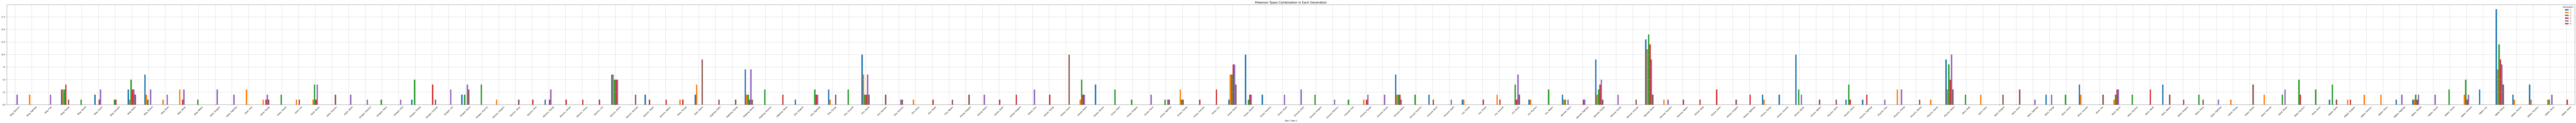

In [9]:
display("Warning, horizontal longcat! It's long so the bar of each generation is visible. Click on the plot twice to see the full graph")
gph = pd.pivot_table(sPoke, values='Name', index=['Type 1', 'Type 2'], columns=['Generation'], aggfunc='count', fill_value=0)
gph.plot(kind='bar', figsize=[250,10], rot=45, grid=True).set_title("Pokemon Types Combination in Each Generation", fontsize=16)

Next, let's show Pokemon distribution by primary types in each generation. We use pivot_table() again to help group the data. We don't use transpose() this time because the number of rows is small. (^・ω・^ )~

In [10]:
minim = pd.pivot_table(sPoke, values='Name', index=['Type 1'], columns=['Generation'], aggfunc='count', fill_value=0, margins=True)
display(minim)

Generation,1,2,3,4,5,6,All
Type 1,,,,,,,
Bug,14,12,12,10,18,3,69
Dark,0,6,6,3,13,3,31
Dragon,3,0,12,4,9,4,32
Electric,9,7,5,12,8,3,44
Fairy,2,5,0,1,0,9,17
Fighting,7,2,5,3,7,3,27
Fire,14,8,8,5,9,8,52
Flying,0,0,0,0,2,2,4
Ghost,4,1,5,7,5,10,32


And see that table in a graph using plot.bar().

Text(0.5, 1.0, 'Primary Pokemon Types Distribution in All Generation')

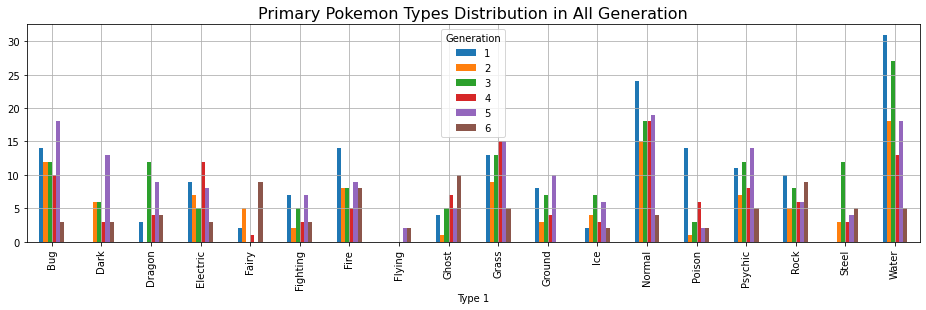

In [11]:
prim = pd.pivot_table(sPoke, values='Name', index=['Type 1'], columns=['Generation'], aggfunc='count', fill_value=0)
prim.plot.bar(figsize=[16,4], grid=True).set_title("Primary Pokemon Types Distribution in All Generation", fontsize=16)

From this section we can see:
 - Gen 6 has the least total Pokemon number among 6 generations, counting at 82 Pokemon; gen 1 has the most total Pokemon number with 166.
 - Water is the most prevalent in the first 3 generation as primary types, normal in generation 4-5, and ghost in generation 6.
 - Pure Normal type has the most count across generation, and pure Water type has the most count in a single generation.

## 2. Legendary Pokemon Types in Generation 3
For the second objective, we want to know the types of legendaries in 3rd generation of Pokemon games.<br>
First we pick pokemon in generation 3 from our original dataframe using conditionals and put it in a dataframe named gen3.

In [12]:
gen3 = df[df['Generation'] == 3]

Now let's see if the data are separated. Here we show the legendary pokemon available in generation 3 using display().

In [13]:
leg = gen3[gen3['Legendary'] == True]
display(leg) #It's not my kink, I swear :(

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
414,377,Regirock,Rock,None,580,80,100,200,50,100,50,3,True
415,378,Regice,Ice,None,580,80,50,100,100,200,50,3,True
416,379,Registeel,Steel,None,580,80,75,150,75,150,50,3,True
417,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
418,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
419,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
420,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
421,382,Kyogre,Water,None,670,100,100,90,150,140,90,3,True
422,382,KyogrePrimal Kyogre,Water,None,770,100,150,90,180,160,90,3,True
423,383,Groudon,Ground,None,670,100,150,140,100,90,90,3,True


Now we show the table in a bar graph using plot(). We also annotate the graph to make their value more obvious for you. Annotate is referenced from [here](https://gist.github.com/Den1al/5b65c88c791a700dbf4482c41d253727).

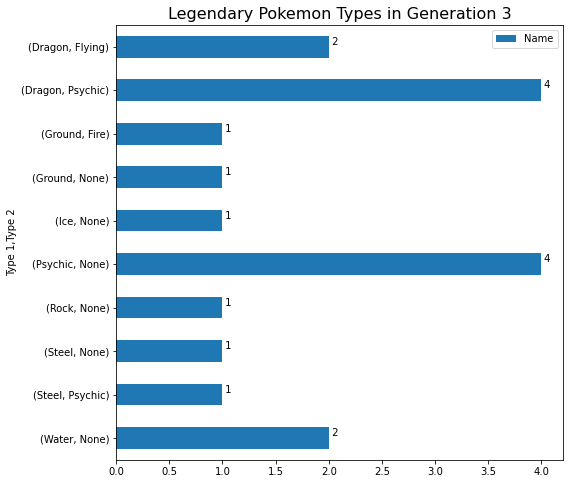

In [14]:
sLeg = leg.groupby(['Type 1','Type 2'])[['Name']].count().plot(kind='barh', figsize=[8,8])
sLeg.set_title("Legendary Pokemon Types in Generation 3", fontsize=16)
sLeg.invert_yaxis()

for i in sLeg.patches:
    sLeg.text(i.get_width(), i.get_y() + 0.2, " {:,}".format(i.get_width()), fontsize=10)

Here we can see the most common types of legendary Pokemon in generation 3 are pure **Psychic** and **Dragon-Psychic** type.

## 3. Pokemons with Highest Stats
For the last objective, we want to know which pokemon has the highest stat in each category. To even the playing field, we will exclude all legendary Pokemon - we still keep the Mega evolution of normal Pokemon and their different form though. We will also delete some columns to focus our data processing.

In [15]:
hStats = df.drop(columns=['#','Total', 'Type 1','Type 2','Generation'])
display(hStats)

,Name,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,Bulbasaur,45,49,49,65,65,45,False
1,Ivysaur,60,62,63,80,80,60,False
2,Venusaur,80,82,83,100,100,80,False
3,VenusaurMega Venusaur,80,100,123,122,120,80,False
4,Charmander,39,52,43,60,50,65,False
...,...,...,...,...,...,...,...,...
795,Diancie,50,100,150,100,150,50,True
796,DiancieMega Diancie,50,160,110,160,110,110,True
797,HoopaHoopa Confined,80,110,60,150,130,70,True
798,HoopaHoopa Unbound,80,160,60,170,130,80,True


In this section, we will filter out the legendary Pokemon from the dataframe and delete the Legendary column.

In [16]:
hStats = hStats[~hStats['Legendary']==True]
hStats.drop(columns='Legendary', inplace=True)
display(hStats)

,Name,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,45,49,49,65,65,45
1,Ivysaur,60,62,63,80,80,60
2,Venusaur,80,82,83,100,100,80
3,VenusaurMega Venusaur,80,100,123,122,120,80
4,Charmander,39,52,43,60,50,65
...,...,...,...,...,...,...,...
787,GourgeistSuper Size,85,100,122,58,75,54
788,Bergmite,55,69,85,32,35,28
789,Avalugg,95,117,184,44,46,28
790,Noibat,40,30,35,45,40,55


Now, we want to get Pokemon with highest stats in each category. We will query the data with conditionals, store the data in several variables, and store the variables in a list to concatenate them.

In [17]:
hp = hStats[hStats.HP == hStats.HP.max()]
atk = hStats[hStats.Attack == hStats.Attack.max()]
dfs = hStats[hStats.Defense == hStats.Defense.max()]
spa = hStats[hStats['Sp. Atk'] == hStats['Sp. Atk'].max()]
spd = hStats[hStats['Sp. Def'] == hStats['Sp. Def'].max()]
spe = hStats[hStats.Speed == hStats.Speed.max()]

lst = [hp, atk, dfs, spa, spd, spe]

Next we will use concat() to join the data in a new dataframe to get a list of Pokemon with highest base stats.

In [18]:
res = pd.concat(lst)
display(res)

,Name,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
261,Blissey,255,10,10,75,135,55
232,HeracrossMega Heracross,80,185,115,40,105,75
224,SteelixMega Steelix,75,125,230,55,95,30
230,Shuckle,20,10,230,10,230,5
333,AggronMega Aggron,70,140,230,60,80,50
71,AlakazamMega Alakazam,55,50,65,175,95,150
230,Shuckle,20,10,230,10,230,5
315,Ninjask,61,90,45,50,50,160


From the table we can see that:
 1. Shuckle has highest base stats in Defense and Sp. Def, but the other stats are just sad :(
 2. Blissey has the single most value in all category with 255 HP and decent value in both defense and Sp. Def
 3. Ninjask has the lowest value in all category within the table, but is the swiftest in all generation

## Conclusion
From the result, we know several things based on our objectives:
 1. Show Pokemon distribution across generations
  - We can see from the graph that the number of Pokemon in each generation varies, from 82 Pokemon in gen 6 to 166 Pokemon in gen 1. Normal-None type pokemon is the most common type combination, followed by Water-None.
  - Water-None has the highest count in single generation, with 19 Pokemon in generation 1 having this type.
<br><br>
 2. Legendary Pokemon types in generation 3 games
  - Gen 3 has the most legendaries at 18 Pokemon, and the most common type is Psychic and Dragon-Psychic. It may be interesting to note if one exclude the Mega evolution, Primal evolution, and multiple Forme, there are only 10 unique legendaries.
  - Dragon is the most occuring as primary type for these legendaries, while majority of them has None as their secondary type.
<br><br>
 3. Show Pokemon with highest base stats in each category (Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed)
  - There are 8 unique Pokemon having highest base stats in all category. Defense categories have multiple entries (3 Pokemon) and Shuckle held highest base stat on two categories (Defense and Sp. Def).
  - While having high base stat in one category is an advantage by itself, each of these Pokemon in the list have unbalanced stats. Trainer should take extra care on how to maximize those stat advantage.